In [75]:
'''
Title: INF2178 Assignment 2
Student Nmae : Kaiwen Suo
Course : INF2178
Date : Feb 29 2024
'''

'\nTitle: INF2178 Assignment 2 \nStudent Nmae : Kaiwen Suo\nCourse : INF2178 \nDate : Feb 29 2024\n'

In [76]:
# Import neccecisties packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
%pip install bioinfokit
from bioinfokit.analys import stat

In [77]:
# Load the dataset
df = pd.read_excel('/content/drive/MyDrive/INF2178_A2_data.xlsx')
df.info() # show dataset structure
df.head() # display few details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _id          1063 non-null   int64 
 1   LOC_ID       1063 non-null   int64 
 2   LOC_NAME     1063 non-null   object
 3   AUSPICE      1063 non-null   object
 4   ADDRESS      1063 non-null   object
 5   PCODE        1063 non-null   object
 6   ward         1063 non-null   int64 
 7   bldg_type    1063 non-null   object
 8   BLDGNAME     715 non-null    object
 9   IGSPACE      1063 non-null   int64 
 10  TGSPACE      1063 non-null   int64 
 11  PGSPACE      1063 non-null   int64 
 12  KGSPACE      1063 non-null   int64 
 13  SGSPACE      1063 non-null   int64 
 14  TOTSPACE     1063 non-null   int64 
 15  subsidy      1063 non-null   object
 16  cwelcc_flag  1063 non-null   object
dtypes: int64(9), object(8)
memory usage: 141.3+ KB


,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y


In [78]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

_id              0
LOC_ID           0
LOC_NAME         0
AUSPICE          0
ADDRESS          0
PCODE            0
ward             0
bldg_type        0
BLDGNAME       348
IGSPACE          0
TGSPACE          0
PGSPACE          0
KGSPACE          0
SGSPACE          0
TOTSPACE         0
subsidy          0
cwelcc_flag      0
dtype: int64


In [79]:
# reshape the d dataframe suitable for statsmodels package
df_melt = pd.melt(df, id_vars=['AUSPICE'], value_vars=['TOTSPACE'])

# replace column names
df_melt.columns = ['AUSPICE', 'Variable','Value']


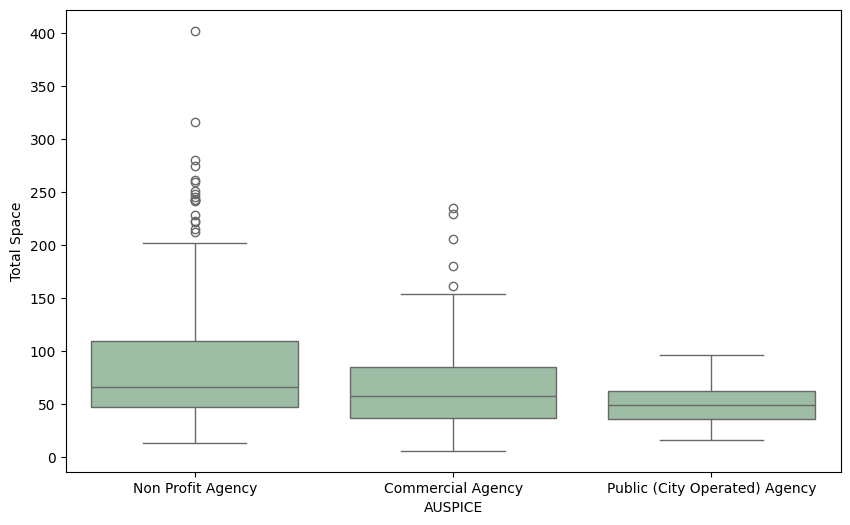

In [80]:
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can
# easily detect the differences between different treatments
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='AUSPICE', y='Value', data=df_melt, color='#99c2a2')
ax.set_ylabel('Total Space')
plt.show()

In [81]:
# Ordinary Least Squares (OLS) model
model = ols('Value ~ C(AUSPICE)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# ANOVA table
res = stat()
res.anova_stat(df=df_melt, res_var='Value', anova_model='Value ~ C(AUSPICE)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,9.611211e+04,48056.057145,21.843051,5.057716e-10
Residual,1060.0,2.332065e+06,2200.061571,NaN,NaN


In [82]:
#post hoc test using Scheffe's test or Tukey's HSD
res = stat()
res.tukey_hsd(df=df_melt, res_var='Value', xfac_var='AUSPICE', anova_model='Value ~ C(AUSPICE)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,17.119417,9.703599,24.535235,7.662434,0.001000
1,Non Profit Agency,Public (City Operated) Agency,34.334610,16.224077,52.445142,6.292710,0.001000
2,Commercial Agency,Public (City Operated) Agency,17.215193,-1.453146,35.883531,3.060857,0.077966


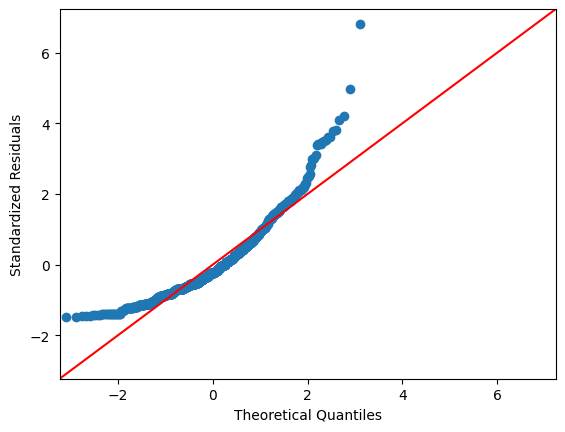

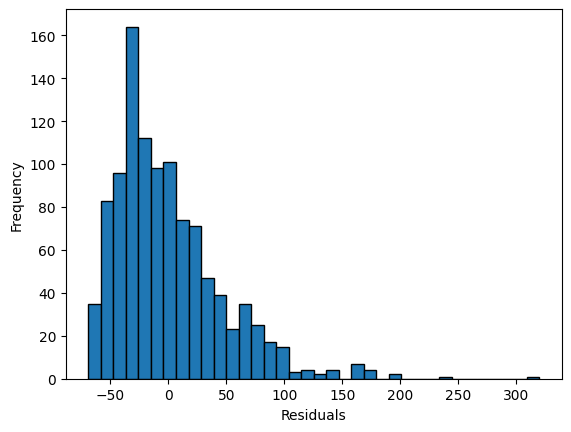

In [83]:
#checking model diagnostics


# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [84]:
#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print(f'Shapiro Wilk test statistic: {w}')
print(f'p-value: {pvalue}')

Shapiro Wilk test statistic: 0.901775598526001
p-value: 1.4964898448030214e-25


In [85]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=df_melt, res_var='Value', xfac_var='AUSPICE')
res.levene_summary

,Parameter,Value
0,Test statistics (W),17.9271
1,Degrees of freedom (Df),2.0000
2,p value,0.0000


In [86]:
# Two-way Anova
d = pd.read_excel('/content/drive/MyDrive/INF2178_A2_data.xlsx')
# Reshaping the DataFrame to long format
d = pd.melt(d, id_vars=['AUSPICE', 'subsidy'], value_vars=['TOTSPACE'])

# Correct the column names if necessary (if you want specific names for 'variable' and 'value')
d.columns = ['AUSPICE', 'subsidy', 'Variable', 'TOTSPACE']

# Display
d.head()


,AUSPICE,subsidy,Variable,TOTSPACE
0,Non Profit Agency,Y,TOTSPACE,164
1,Non Profit Agency,Y,TOTSPACE,83
2,Non Profit Agency,Y,TOTSPACE,102
3,Non Profit Agency,Y,TOTSPACE,65
4,Non Profit Agency,Y,TOTSPACE,26


<Axes: xlabel='AUSPICE', ylabel='TOTSPACE'>

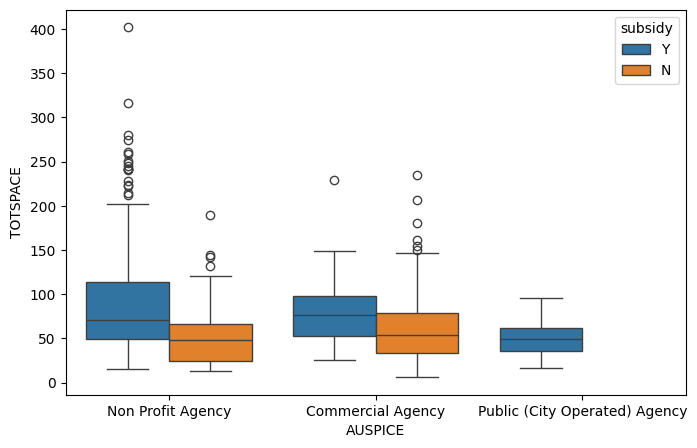

In [87]:
# Boxplot of TOTSPACE by AUSPICE and subsidy
plt.figure(figsize=(8, 5))
sns.boxplot(x="AUSPICE", y="TOTSPACE", hue="subsidy",data=d)

In [88]:
# Define OLS Model
model2 = ols('TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)', data=d).fit()

# Conduct ANOVA
anova_table = sm.stats.anova_lm(model2, typ=2)


In [89]:
# Display ANOVA Table
res = stat()
res.anova_stat(df=d, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,8.567996e+03,4283.998054,2.057586,1.282730e-01
C(subsidy),1.0,8.352744e+04,83527.441787,40.117876,3.529094e-10
C(AUSPICE):C(subsidy),2.0,5.603445e+04,28017.227037,13.456555,1.694282e-06
Residual,1058.0,2.202809e+06,2082.050461,NaN,NaN


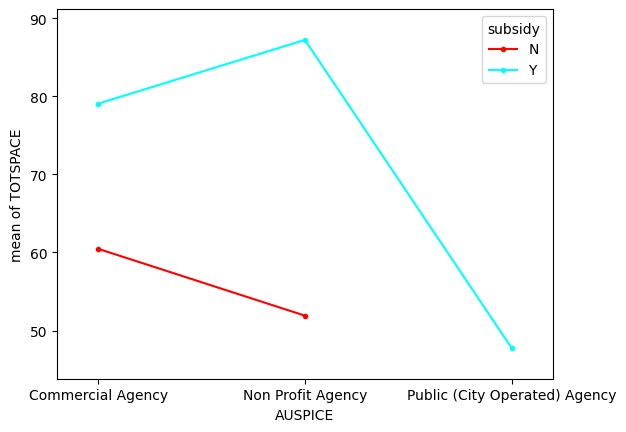

In [90]:
# Conduct the interaction plot
fig = interaction_plot(x=d['AUSPICE'],trace=d['subsidy'],response=d['TOTSPACE'])
plt.show()

In [91]:
# post hoc test using Scheffe's test or Tukey's HSD(AUSPICE)
res.tukey_hsd(df=d, res_var='TOTSPACE',xfac_var='AUSPICE',anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,17.119417,9.905213,24.333621,7.876596,0.001000
1,Non Profit Agency,Public (City Operated) Agency,34.334610,16.716448,51.952772,6.468588,0.001000
2,Commercial Agency,Public (City Operated) Agency,17.215193,-0.945610,35.375996,3.146407,0.067567


In [92]:
# post hoc test using Scheffe's test or Tukey's HSD(subsidy)
res.tukey_hsd(df=d, res_var='TOTSPACE',xfac_var='subsidy',anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Y,N,26.265831,20.400592,32.13107,12.426982,0.001


In [93]:
# post hoc test using Scheffe's test or Tukey's HSD(interaction)
res.tukey_hsd(df=d, res_var='TOTSPACE',xfac_var=['AUSPICE','subsidy'],anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary.head()

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Non Profit Agency, Y)","(Non Profit Agency, N)",35.327657,21.377488,49.277825,10.224542,0.001000
1,"(Non Profit Agency, Y)","(Commercial Agency, Y)",8.165515,-7.512442,23.843471,2.102822,0.650278
2,"(Non Profit Agency, Y)","(Commercial Agency, N)",26.764597,16.861524,36.667669,10.911871,0.001000
3,"(Non Profit Agency, Y)","(Public (City Operated) Agency, Y)",39.460387,17.934574,60.986199,7.401338,0.001000
4,"(Non Profit Agency, Y)","(Public (City Operated) Agency, N)",0.000000,-inf,inf,0.000000,0.900000


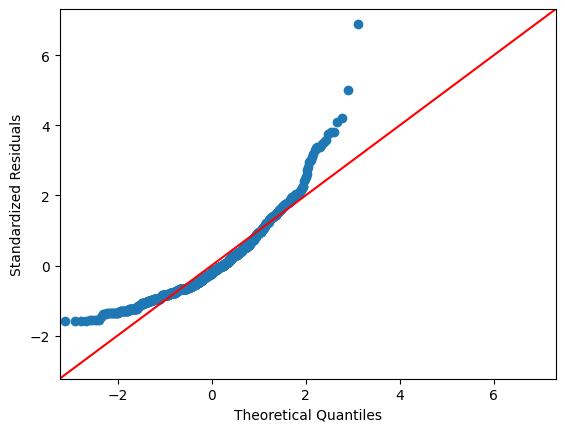

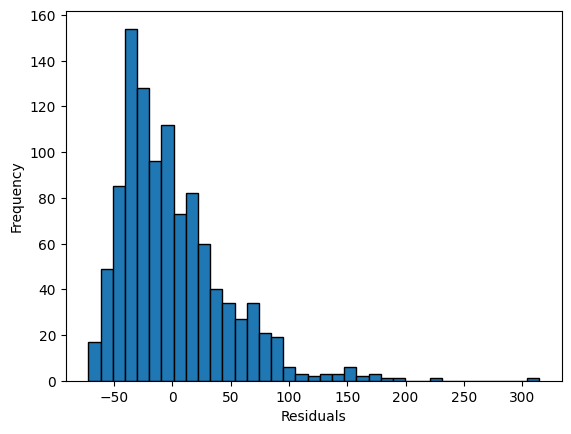

In [94]:
# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [95]:
#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model2.resid)
print(f'Shapiro Wilk test statistic: {w}')
print(f'p-value: {pvalue}')

Shapiro Wilk test statistic: 0.9018619656562805
p-value: 1.5311055543621852e-25


In [96]:
#Assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
d['AUSPICE_subsidy_interaction'] = d['AUSPICE'].astype(str) + "_" + d['subsidy'].astype(str)
res.levene(df=d, res_var='TOTSPACE', xfac_var='AUSPICE_subsidy_interaction')
res.levene_summary

,Parameter,Value
0,Test statistics (W),12.9847
1,Degrees of freedom (Df),4.0000
2,p value,0.0000


# ***Exploratory Data Analysis***

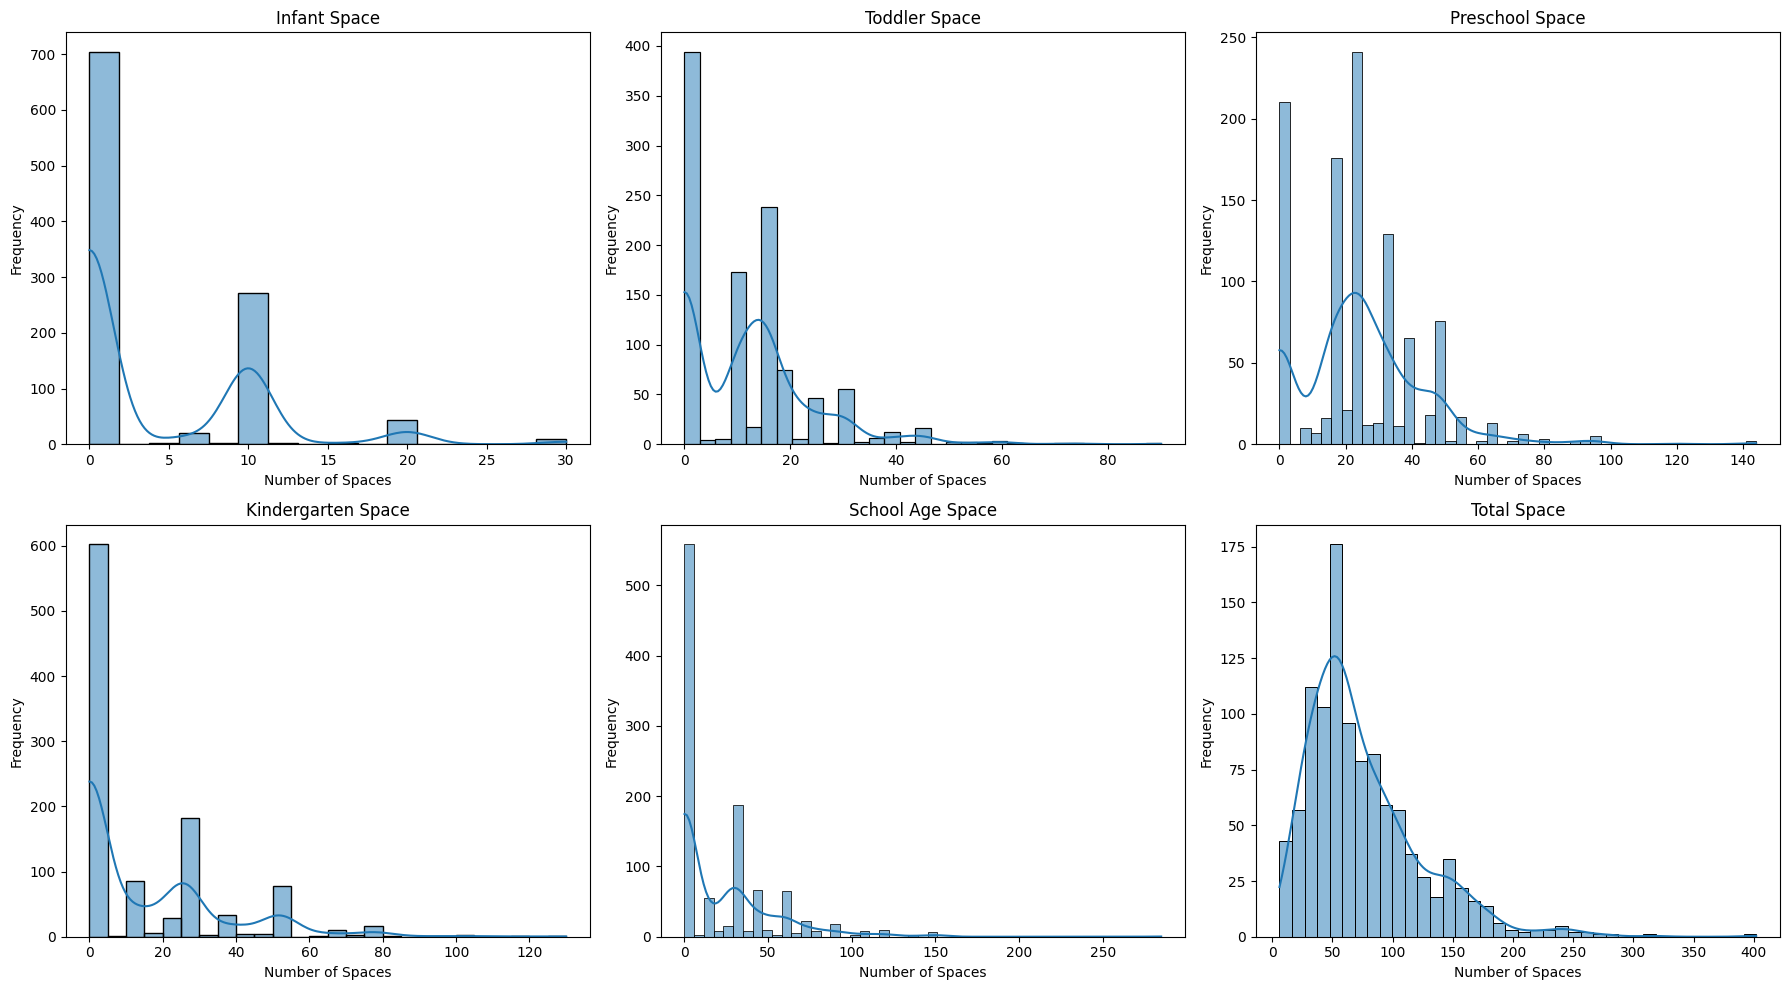

In [97]:
# Distribution plots for continuous variables
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# List of continuous variables
continuous_vars = ['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE', 'TOTSPACE']
titles = ['Infant Space', 'Toddler Space', 'Preschool Space', 'Kindergarten Space', 'School Age Space', 'Total Space']

for ax, var, title in zip(axs.flat, continuous_vars, titles):
    sns.histplot(df[var], kde=True, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Number of Spaces')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [98]:
# Get Descriptive Statistics of TOTSPACE
Descriptive=df['TOTSPACE'].describe()
print(Descriptive)

count    1063.000000
mean       75.674506
std        47.816518
min         6.000000
25%        43.000000
50%        62.000000
75%        97.000000
max       402.000000
Name: TOTSPACE, dtype: float64
